In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/Pythondatasets/Mjesecni_Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv', parse_dates=True, index_col='Date (LT)')
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,
2018-05-27 02:00:00,Sarajevo,PM2.5 - Principal,2018,5,27,2,40.6,114,Unhealthy for Sensitive Groups,64,UG/M3,1 Hr,Valid,5/27/2018 1:00,105
2018-06-17 21:00:00,Sarajevo,PM2.5 - Principal,2018,6,17,21,42.6,118,Unhealthy for Sensitive Groups,43,UG/M3,1 Hr,Valid,6/17/2018 20:00,620
2018-07-14 21:00:00,Sarajevo,PM2.5 - Principal,2018,7,14,21,49.4,135,Unhealthy for Sensitive Groups,71,UG/M3,1 Hr,Valid,7/14/2018 20:00,1265
2018-08-11 16:00:00,Sarajevo,PM2.5 - Principal,2018,8,11,16,55.1,149,Unhealthy for Sensitive Groups,63,UG/M3,1 Hr,Valid,8/11/2018 15:00,1926
2018-09-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,9,22,19,41.9,117,Unhealthy for Sensitive Groups,46,UG/M3,1 Hr,Valid,9/22/2018 18:00,2936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-04 01:00:00,Sarajevo,PM2.5 - Principal,2023,1,4,1,333.4,383,Hazardous,375,UG/M3,1 Hr,Valid,1/4/2023 0:00,38700
2023-02-12 23:00:00,Sarajevo,PM2.5 - Principal,2023,2,12,23,224.1,274,Very Unhealthy,248,UG/M3,1 Hr,Valid,2/12/2023 22:00,39653
2023-03-03 02:00:00,Sarajevo,PM2.5 - Principal,2023,3,3,2,144.5,197,Unhealthy,154,UG/M3,1 Hr,Valid,3/3/2023 1:00,40084


In [4]:
df_aqi = data[['AQI']]
df_aqi

,AQI
Date (LT),
2018-05-27 02:00:00,114
2018-06-17 21:00:00,118
2018-07-14 21:00:00,135
2018-08-11 16:00:00,149
2018-09-22 19:00:00,117
...,...
2023-01-04 01:00:00,383
2023-02-12 23:00:00,274
2023-03-03 02:00:00,197


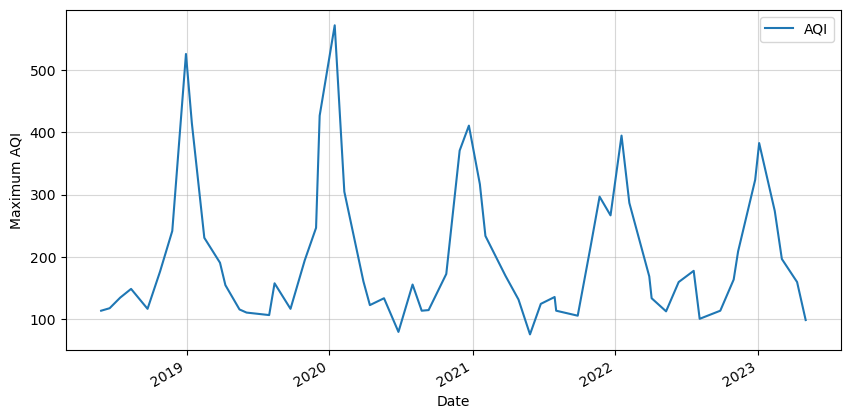

In [5]:
df_aqi.plot(figsize=(10,5))
plt.grid(alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.show()

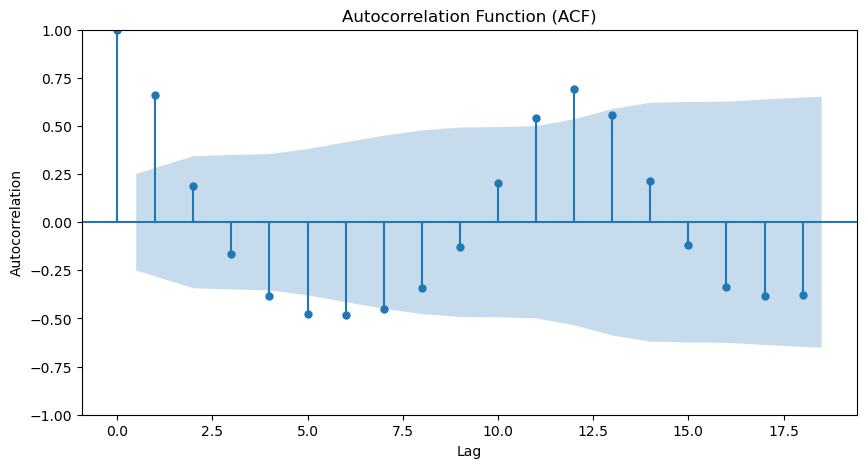

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


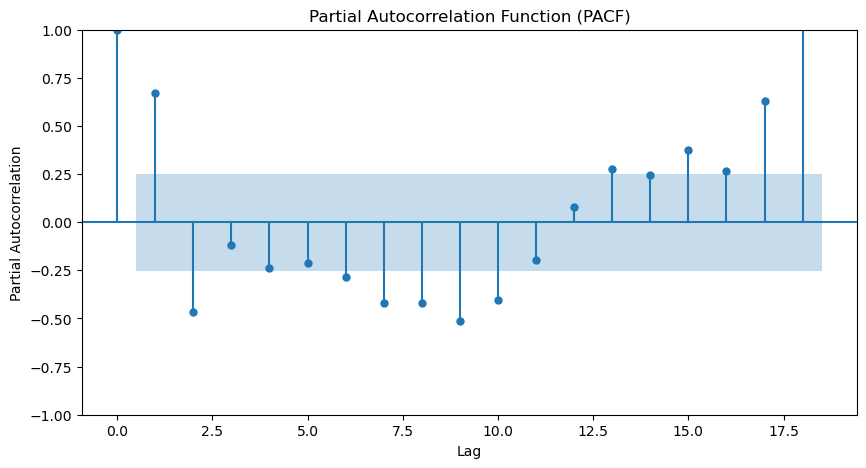

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_aqi, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_aqi, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

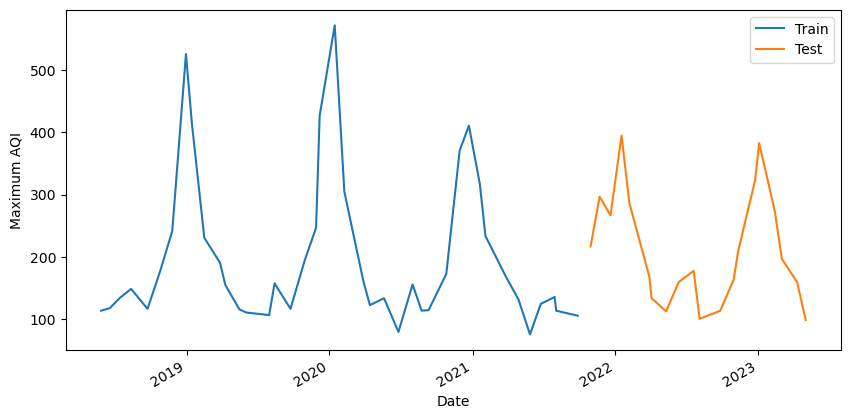

In [8]:
df_train = df_aqi.loc[:'10-29-2021 10:00:00']
df_test = df_aqi.loc['10-29-2021 10:00:00':]

# Plot the last 10 years of training data and the 2 of testing
ax = df_train.plot(figsize=(10, 5))
df_test.plot(ax=ax)
plt.legend(['Train', 'Test'])
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.show()

In [10]:
import itertools
import math
import statsmodels.api as sm


# Define the range of values for p, d, q, P, D, Q, and m
p_values = range(0, 3)  # Autoregressive order
d_values = [0]          # Differencing order
q_values = range(0, 3)  # Moving average order
P_values = range(0, 2)  # Seasonal autoregressive order
D_values = range(0, 1)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order
m_values = [12]         # Seasonal period

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values))

# Initialize AIC with a large value
best_aic = float("inf")  
best_params = None

# Perform grid search
for params in param_combinations:
    order = params[:3]
    seasonal_order = params[3:]
    
    
    model = sm.tsa.SARIMAX(df_train, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)
    aic = result.aic
    print(result)
        # Ensure the convergence of the model
    if not math.isinf(result.zvalues.mean()):
        print(order, seasonal_order, aic)
        
        if aic < best_aic:
            best_aic = aic
            best_params = params
                
    else:
        print(order, seasonal_order, 'not converged')

    

# Print the best parameters and AIC
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(0, 0, 0) (0, 0, 0, 12) 565.4016125018395
(0, 0, 0) (0, 0, 1, 12) 540.1372783934943
(0, 0, 0) (1, 0, 0, 12) 496.99471452092325
(0, 0, 0) (1, 0, 1, 12) 508.4486357922319
(0, 0, 1) (0, 0, 0, 12) 527.9962740149695


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, f

(0, 0, 1) (0, 0, 1, 12) 512.8854119741835
(0, 0, 1) (1, 0, 0, 12) 493.1465678796374


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


(0, 0, 1) (1, 0, 1, 12) 488.3266160005658
(0, 0, 2) (0, 0, 0, 12) 509.5797068424666


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(0, 0, 2) (0, 0, 1, 12) 502.70891161901505


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 2) (1, 0, 0, 12) 493.82070952422305


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Korisni

(0, 0, 2) (1, 0, 1, 12) 489.5402923439995
(1, 0, 0) (0, 0, 0, 12) 495.3192990700454
(1, 0, 0) (0, 0, 1, 12) 490.19012490852356
(1, 0, 0) (1, 0, 0, 12) 486.73873672559307


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(1, 0, 0) (1, 0, 1, 12) 484.44447183569997
(1, 0, 1) (0, 0, 0, 12) 493.58599534409393


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(1, 0, 1) (0, 0, 1, 12) 491.46203826523595


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 0, 0, 12) 488.72219503937583


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


(1, 0, 1) (1, 0, 1, 12) 482.75379388382186
(1, 0, 2) (0, 0, 0, 12) 495.58208883054516


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(1, 0, 2) (0, 0, 1, 12) 492.8072362904692


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

(1, 0, 2) (1, 0, 0, 12) 483.81828019578376
(1, 0, 2) (1, 0, 1, 12) 480.83724577823165
(2, 0, 0) (0, 0, 0, 12) 494.4127808574872


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(2, 0, 0) (0, 0, 1, 12) 491.7318998691742


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 0) (1, 0, 0, 12) 488.7327877725286


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


(2, 0, 0) (1, 0, 1, 12) 486.2194241852455
(2, 0, 1) (0, 0, 0, 12) 495.5843854683233


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(2, 0, 1) (0, 0, 1, 12) 493.3078217428783


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

(2, 0, 1) (1, 0, 0, 12) 484.7827767802076
(2, 0, 1) (1, 0, 1, 12) 481.72157931646683


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\U

(2, 0, 2) (0, 0, 0, 12) 493.0963702473385


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 2) (0, 0, 1, 12) 489.69028691517116


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


(2, 0, 2) (1, 0, 0, 12) 485.654420764635
(2, 0, 2) (1, 0, 1, 12) 482.78520389726566
Best Parameters: (1, 0, 2, 1, 0, 1, 12)
Best AIC: 480.83724577823165


In [11]:
model = sm.tsa.SARIMAX(df_train,
                       order=best_params[:3],
                       seasonal_order=best_params[3:])
result = model.fit(disp=False)

# Show the summary
result.summary()

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  AQI   No. Observations:                   41
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -234.419
Date:                              Wed, 30 Aug 2023   AIC                            480.837
Time:                                      12:43:55   BIC                            491.119
Sample:                                           0   HQIC                           484.581
                                               - 41                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.236      4.230      0.000       0.537       1.463
ma.L1         -0.6296      1.014     -0.621      0.534      -2.616       1.357
ma.L2         -0.3686      0.527     -0.699      0.484      -1.402       0.664
ar.S.L12       0.9957      0.051     19.563      0.000       0.896       1.095
ma.S.L12      -0.8386      0.901     -0.930      0.352      -2.605       0.928
sigma2      2745.8973      0.000   2.73e+07      0.000    2745.897    2745.898
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                35.99
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             1.52
Prob(H) (two-sided):                  0.87   Kurtosis:                         6.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.74e+25. Standard errors may be unstable.
"""

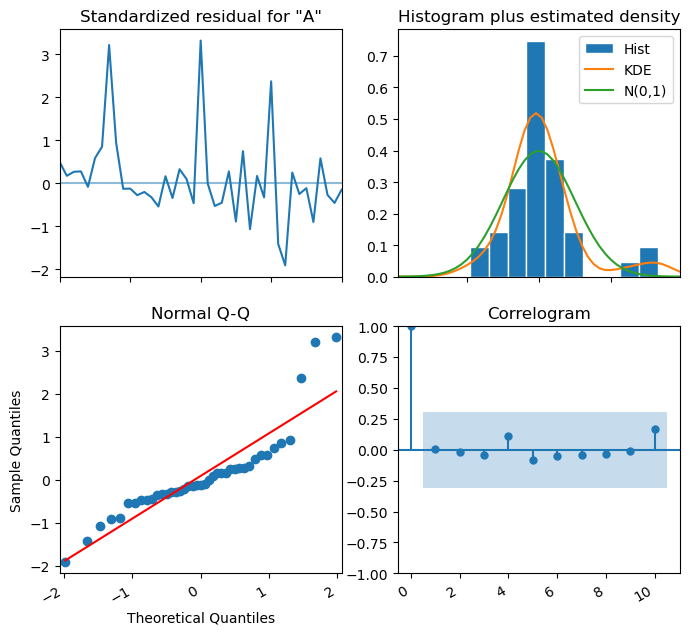

In [12]:
fig = result.plot_diagnostics(figsize=(8, 8))
fig.autofmt_xdate()
plt.show()

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


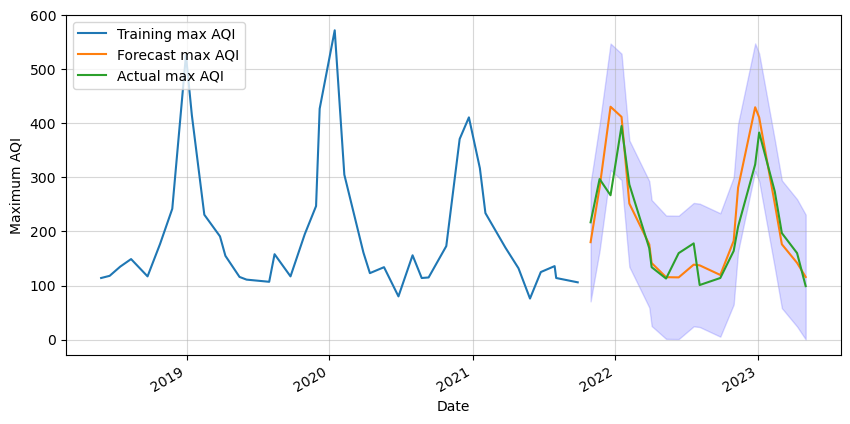

In [18]:
# Get forecast and confidence intervals for two years
forecast = result.get_forecast(steps=20)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_values.index=df_test.index

# Plot forecast with training data
ax = df_train.plot(figsize=(10,5))
forecast_values.plot()
df_test.plot(ax=ax)
plt.fill_between(forecast_values.index, 
                 confidence_intervals['lower AQI'], 
                 confidence_intervals['upper AQI'], 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training max AQI', 
            'Forecast max AQI', 
            'Actual max AQI'], 
           loc='upper left')
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.grid(alpha=0.5)
plt.show()

In [14]:
confidence_intervals

,lower AQI,upper AQI
41,70.701671,289.798616
42,164.439784,398.139346
43,313.828824,547.528636
44,295.087306,528.787369
45,134.810393,368.510706
46,59.409541,293.110103
47,25.193105,258.216427
48,1.422917,229.595001
49,1.057139,229.229467
50,24.603287,252.775859


In [19]:
# Predicted values and actual values
predicted_values = forecast_values.values
actual_values = df_test.values.flatten()

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(predicted_values - actual_values))
print("MAE:", mae)

# Root Mean Squared Error (RMSE)
mse = np.mean((predicted_values - actual_values) ** 2)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((predicted_values - actual_values) / actual_values)) * 100
print("MAPE:", mape)

MAE: 35.72483606318869
RMSE: 51.95176753770112
MAPE: 16.81209380001773


In [20]:
# Install the library if necessary
!pip install pmdarima

# Import the library
from pmdarima.arima import auto_arima

# Build and fit the AutoARIMA model
model = auto_arima(df_train, 
                   seasonal=True, 
                   m=12, 
                   suppress_warnings=True)
model.fit(df_train)

# Check the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                   41
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood                -155.910
Date:                    Wed, 30 Aug 2023   AIC                            321.819
Time:                            12:51:05   BIC                            328.656
Sample:                                 0   HQIC                           323.960
                                     - 41                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -14.8660      8.407     -1.768      0.077     -31.344       1.612
ar.S.L12      -0.9683      0.254     -3.809      0.000      -1.467      -0.470
ar.S.L24      -0.9253      0.156     -5.950      0.000      -1.230      -0.621
ma.S.L12      -0.8571      1.981     -0.433      0.665      -4.739       3.025
sigma2       205.3131      0.012   1.78e+04      0.000     205.291     205.336
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.66   Prob(JB):                         0.38
Heteroskedasticity (H):               1.58   Skew:                             0.00
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.17e+21. Standard errors may be unstable.
"""

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


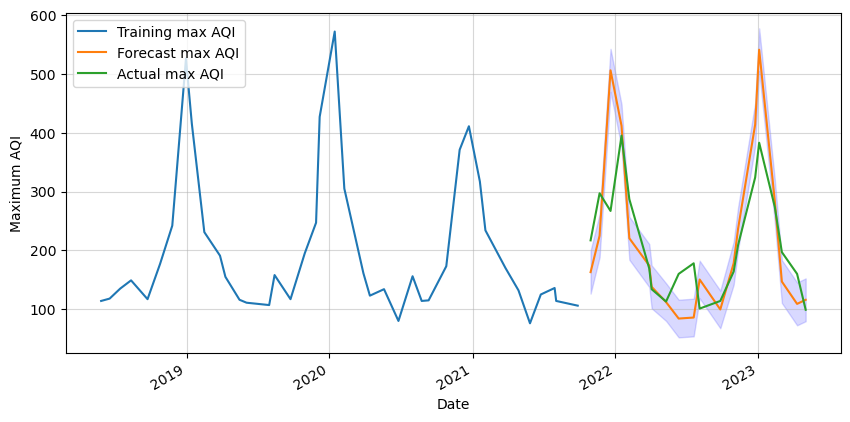

In [22]:
# Make predictions
forecast_auto, conf_int_auto = model.predict(n_periods=20,
                                             return_conf_int=True)
forecast_auto.index=df_test.index
# Get forecast and confidence intervals for two years
forecast_values_auto = forecast_auto
confidence_intervals_auto = conf_int_auto

# Plot forecast with training data
ax = df_train[-12*4:].plot(figsize=(10,5))
forecast_auto.plot(ax=ax)
df_test.plot(ax=ax)
plt.fill_between(forecast_values_auto.index, 
                 confidence_intervals_auto[:,[0]].flatten(), 
                 confidence_intervals_auto[:,[1]].flatten(), 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training max AQI', 
            'Forecast max AQI', 
            'Actual max AQI'], 
           loc='upper left')
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.grid(alpha=0.5)
plt.show()

In [23]:
# Predicted values and actual values
predicted_values_auto = forecast_auto.values
actual_values = df_test.values.flatten()

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(predicted_values_auto - actual_values))
print("MAE:", mae)

# Root Mean Squared Error (RMSE)
mse = np.mean((predicted_values_auto - actual_values) ** 2)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((predicted_values_auto - actual_values) / actual_values)) * 100
print("MAPE:", mape)

MAE: 55.44661895536795
RMSE: 79.53072193557958
MAPE: 25.151141858621283


In [27]:
dataDnevni = pd.read_csv('C:/Pythondatasets/Dnevni_Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv', parse_dates=True, index_col='Date (LT)')
dataDnevni

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,
2018-05-22 23:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,23,21.2,70,Moderate,24.0,UG/M3,1 Hr,Valid,5/22/2018 22:00,6
2018-05-23 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,23,17,19.1,66,Moderate,20.0,UG/M3,1 Hr,Valid,5/23/2018 16:00,24
2018-05-24 23:00:00,Sarajevo,PM2.5 - Principal,2018,5,24,23,25.7,80,Moderate,29.0,UG/M3,1 Hr,Valid,5/24/2018 22:00,54
2018-05-25 01:00:00,Sarajevo,PM2.5 - Principal,2018,5,25,1,25.4,79,Moderate,26.0,UG/M3,1 Hr,Valid,5/25/2018 0:00,56
2018-05-26 15:00:00,Sarajevo,PM2.5 - Principal,2018,5,26,15,28.5,85,Moderate,31.0,UG/M3,1 Hr,Valid,5/26/2018 14:00,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-06 10:00:00,Sarajevo,PM2.5 - Principal,2023,5,6,10,21.1,70,Moderate,22.0,UG/M3,1 Hr,Valid,5/6/2023 9:00,38541
2023-05-07 23:00:00,Sarajevo,PM2.5 - Principal,2023,5,7,23,14.3,56,Moderate,15.0,UG/M3,1 Hr,Valid,5/7/2023 22:00,38578
2023-05-08 15:00:00,Sarajevo,PM2.5 - Principal,2023,5,8,15,18.6,65,Moderate,21.0,UG/M3,1 Hr,Valid,5/8/2023 14:00,38593


In [28]:
df_aqi_dnevni = dataDnevni[['AQI']]
df_aqi_dnevni

,AQI
Date (LT),
2018-05-22 23:00:00,70
2018-05-23 17:00:00,66
2018-05-24 23:00:00,80
2018-05-25 01:00:00,79
2018-05-26 15:00:00,85
...,...
2023-05-06 10:00:00,70
2023-05-07 23:00:00,56
2023-05-08 15:00:00,65


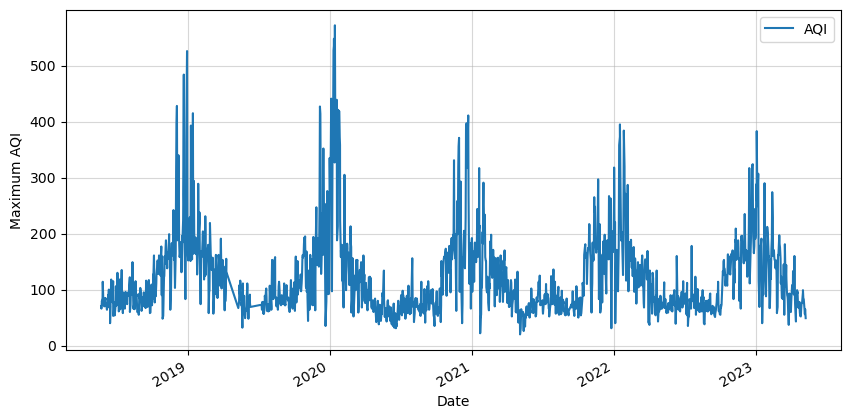

In [29]:
df_aqi_dnevni.plot(figsize=(10,5))
plt.grid(alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.show()

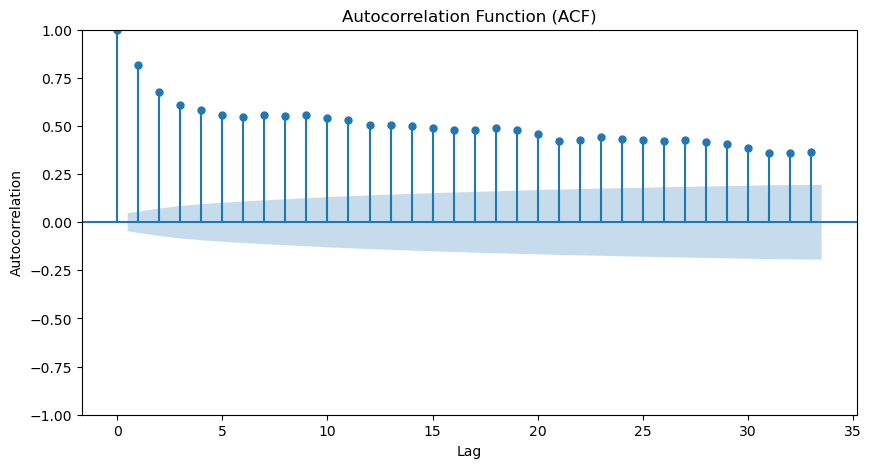

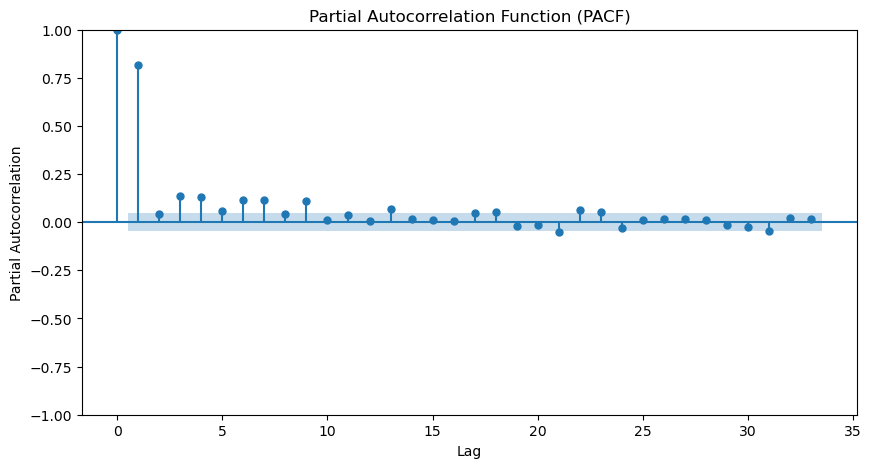

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_aqi_dnevni, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_aqi_dnevni, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

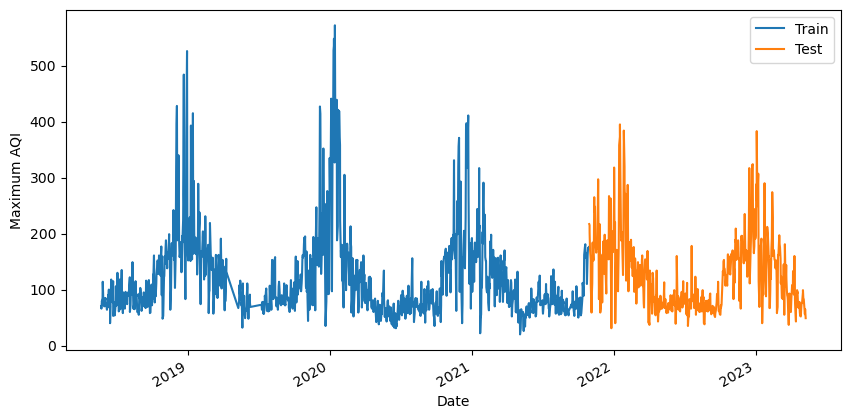

In [32]:
df_train = df_aqi_dnevni.loc[:'10-29-2021 10:00:00']
df_test = df_aqi_dnevni.loc['10-29-2021 10:00:00':]

# Plot the last 10 years of training data and the 2 of testing
ax = df_train.plot(figsize=(10, 5))
df_test.plot(ax=ax)
plt.legend(['Train', 'Test'])
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.show()

In [38]:
import itertools
import math
import statsmodels.api as sm


# Define the range of values for p, d, q, P, D, Q, and m
p_values = range(0, 10)  # Autoregressive order
d_values = [0, 1]          # Differencing order
q_values = range(0, 10)  # Moving average order
P_values = range(0, 10)  # Seasonal autoregressive order
D_values = range(0, 1)  # Seasonal differencing order
Q_values = range(0, 10)  # Seasonal moving average order
m_values = [365]         # Seasonal period

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values))

# Initialize AIC with a large value
best_aic = float("inf")  
best_params = None

# Perform grid search
for params in param_combinations:
    order = params[:3]
    seasonal_order = params[3:]
    
    
    model = sm.tsa.SARIMAX(df_train, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)
    aic = result.aic
    print(result)
        # Ensure the convergence of the model
    if not math.isinf(result.zvalues.mean()):
        print(order, seasonal_order, aic)
        
        if aic < best_aic:
            best_aic = aic
            best_params = params
                
    else:
        print(order, seasonal_order, 'not converged')

    

# Print the best parameters and AIC
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

(0, 0, 0) (0, 0, 0, 365) 15279.103507351318


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


(0, 0, 0) (0, 0, 1, 365) 14817.846562897543


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 1.18 GiB for an array with shape (365, 365, 1193) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 1004, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 1.18 GiB for an array with shape (365, 365, 1193) and data type float64


AttributeError: Memoryview is not initialized

In [34]:
model = sm.tsa.SARIMAX(df_train,
                       order=best_params[:3],
                       seasonal_order=best_params[3:])
result = model.fit(disp=False)

# Show the summary
result.summary()

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  AQI   No. Observations:                 1193
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 12)   Log Likelihood               -6204.054
Date:                              Wed, 30 Aug 2023   AIC                          12420.107
Time:                                      13:25:34   BIC                          12450.613
Sample:                                           0   HQIC                         12431.602
                                             - 1193                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4037      0.040     35.039      0.000       1.325       1.482
ar.L2         -0.4055      0.040    -10.203      0.000      -0.483      -0.328
ma.L1         -0.6961      0.043    -16.310      0.000      -0.780      -0.612
ma.L2         -0.1598      0.028     -5.668      0.000      -0.215      -0.105
ma.S.L12      -0.0755      0.020     -3.848      0.000      -0.114      -0.037
sigma2      1920.6467     39.317     48.850      0.000    1843.587    1997.707
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2500.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

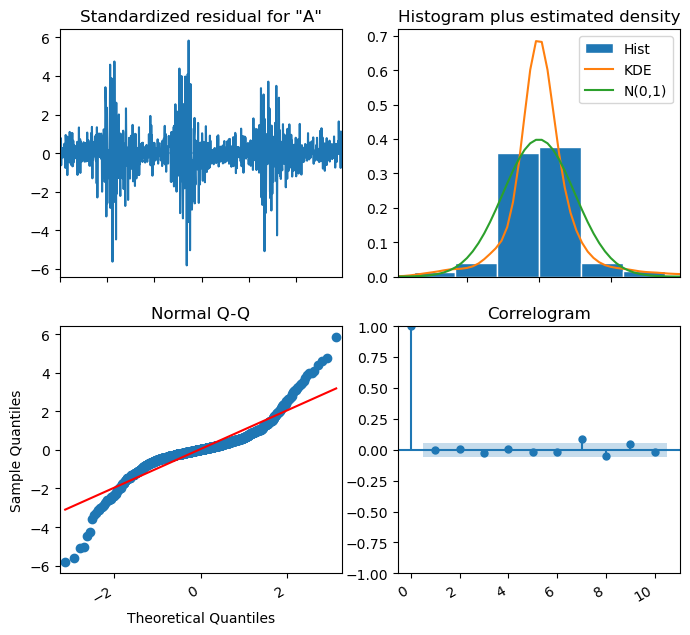

In [35]:
fig = result.plot_diagnostics(figsize=(8, 8))
fig.autofmt_xdate()
plt.show()

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


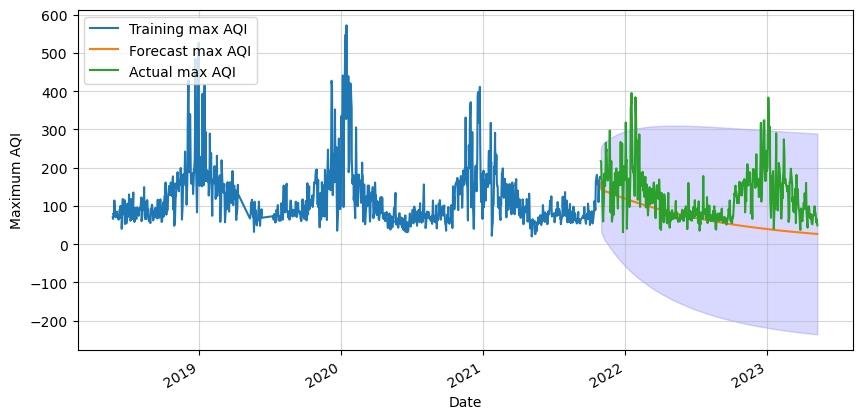

In [37]:
# Get forecast and confidence intervals for two years
forecast = result.get_forecast(steps=559)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_values.index=df_test.index

# Plot forecast with training data
ax = df_train.plot(figsize=(10,5))
forecast_values.plot()
df_test.plot(ax=ax)
plt.fill_between(forecast_values.index, 
                 confidence_intervals['lower AQI'], 
                 confidence_intervals['upper AQI'], 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training max AQI', 
            'Forecast max AQI', 
            'Actual max AQI'], 
           loc='upper left')
plt.xlabel('Date')
plt.ylabel('Maximum AQI')
plt.grid(alpha=0.5)
plt.show()